# Binary Classification of Machine Failures

Представлено 3 файла, в которых подержатся данные для тренировочной выборки - train.csv, для тестовой - test.csv и файл, в котором содержатся ответы для тестовой выборки - sample_submission.csv.

В дата сете есть следующие параметры:<br>Product ID - идентикационнный номер устройства <br>Type - тип устройства <br>Air temperature - температура воздуха, судя по всему, рядом с утройством[K] <br>Process temperature [K] - температура процессора<br>
Rotational speed [rpm] - скорость вращения <br>
Torque [Nm] - крутящий момент<br>
Tool wear [min] - уровень износа<br>
Machine failure - была ошибка или не была(1/0)<br>
TWF, HDF, PWF,OSF,RNF - виды ошибок.
    

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
data_train = pd.read_csv('train.csv', index_col = 'id')
data_test = pd.read_csv('test.csv', index_col = 'id')
data_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
data_train.isnull().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
data_train.shape

(136429, 13)

## EDA

<Axes: xlabel='Type'>

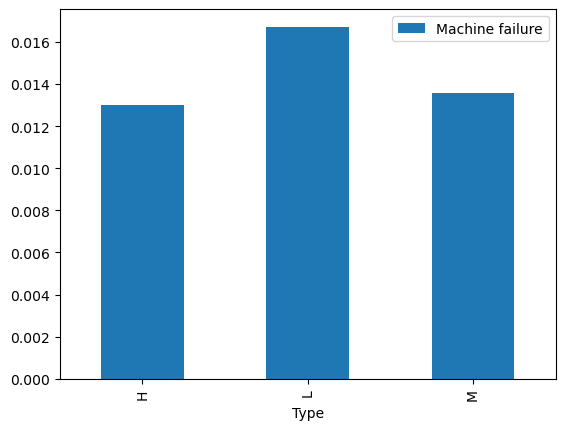

In [6]:
data_train[['Type', 'Machine failure']].groupby(['Type']).mean().plot.bar()

<Axes: xlabel='Type', ylabel='count'>

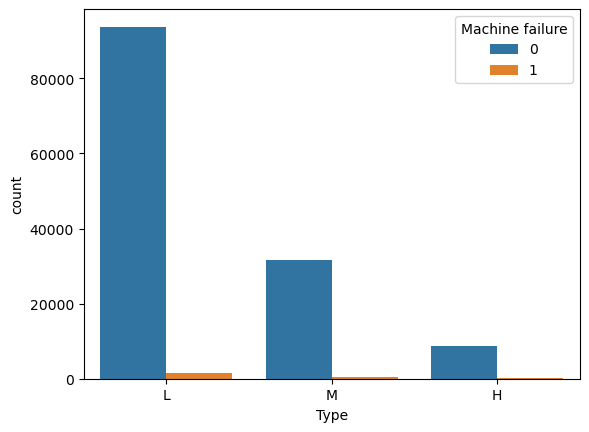

In [7]:
sns.countplot(x='Type',hue='Machine failure',data=data_train)

C:\Users\konop\AppData\Local\Temp\ipykernel_20632\4116080401.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr(), annot= True, linewidths=0.2, cmap="RdYlGn", annot_kws={'size':10})


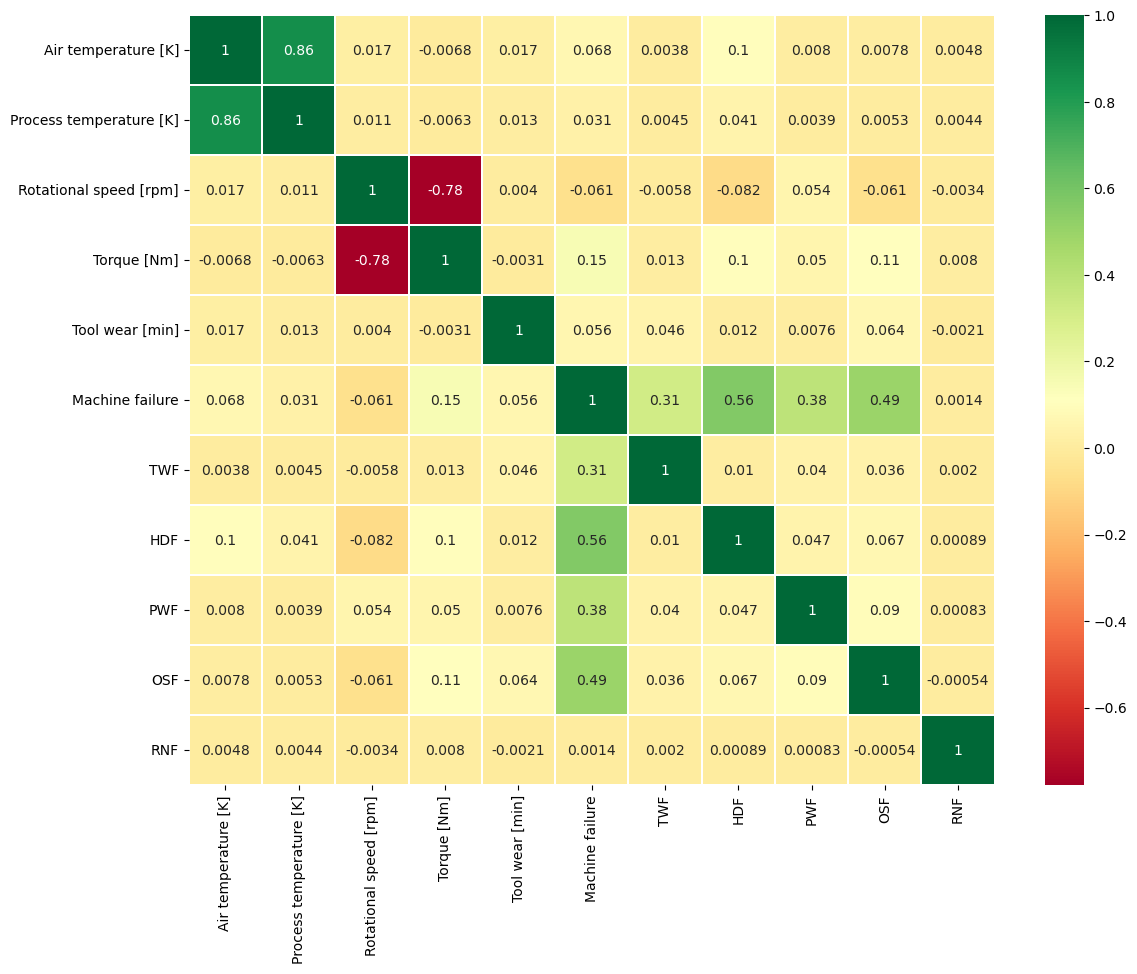

In [8]:
sns.heatmap(data_train.corr(), annot= True, linewidths=0.2, cmap="RdYlGn", annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(13,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

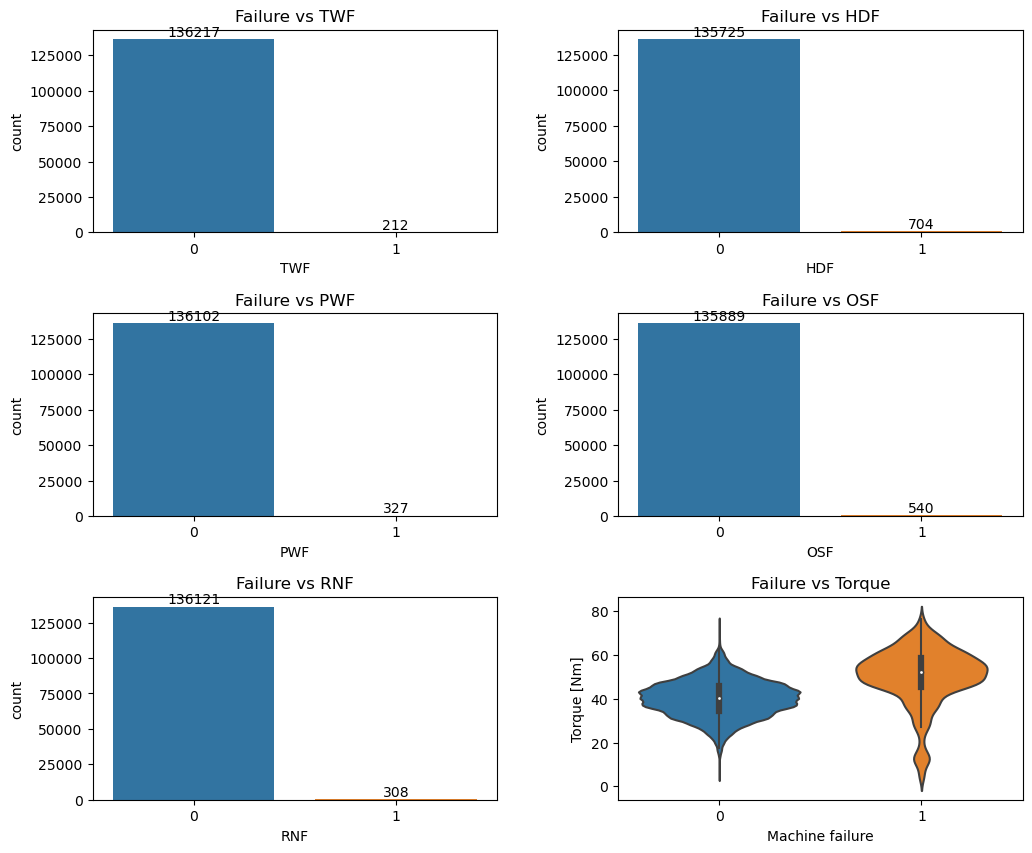

In [9]:
f,ax=plt.subplots(3,2,figsize=(12,10))

sns.countplot(x='TWF',data=data_train,ax=ax[0,0])
ax[0,0].set_title('Failure vs TWF')
ax[0,0].bar_label(ax[0,0].containers[0])

sns.countplot(x='HDF',data=data_train,ax=ax[0,1])
ax[0,1].set_title('Failure vs HDF')
ax[0,1].bar_label(ax[0,1].containers[0])

sns.countplot(x= 'PWF', data=data_train,ax=ax[1,0])
ax[1,0].set_title('Failure vs PWF')
ax[1,0].bar_label(ax[1,0].containers[0])

sns.countplot(x='OSF',data=data_train,ax=ax[1,1])
ax[1,1].set_title('Failure vs OSF')
ax[1,1].bar_label(ax[1,1].containers[0])

sns.countplot(x='RNF',data=data_train,ax=ax[2,0])
ax[2,0].set_title('Failure vs RNF')
ax[2,0].bar_label(ax[2,0].containers[0])

sns.violinplot(x = 'Machine failure', y='Torque [Nm]', data=data_train,ax=ax[2,1])
ax[2,1].set_title('Failure vs Torque')
# ax[2,1].bar_label(ax[2,1].containers[0])

plt.subplots_adjust(wspace=0.3,hspace=0.4)
plt.show()


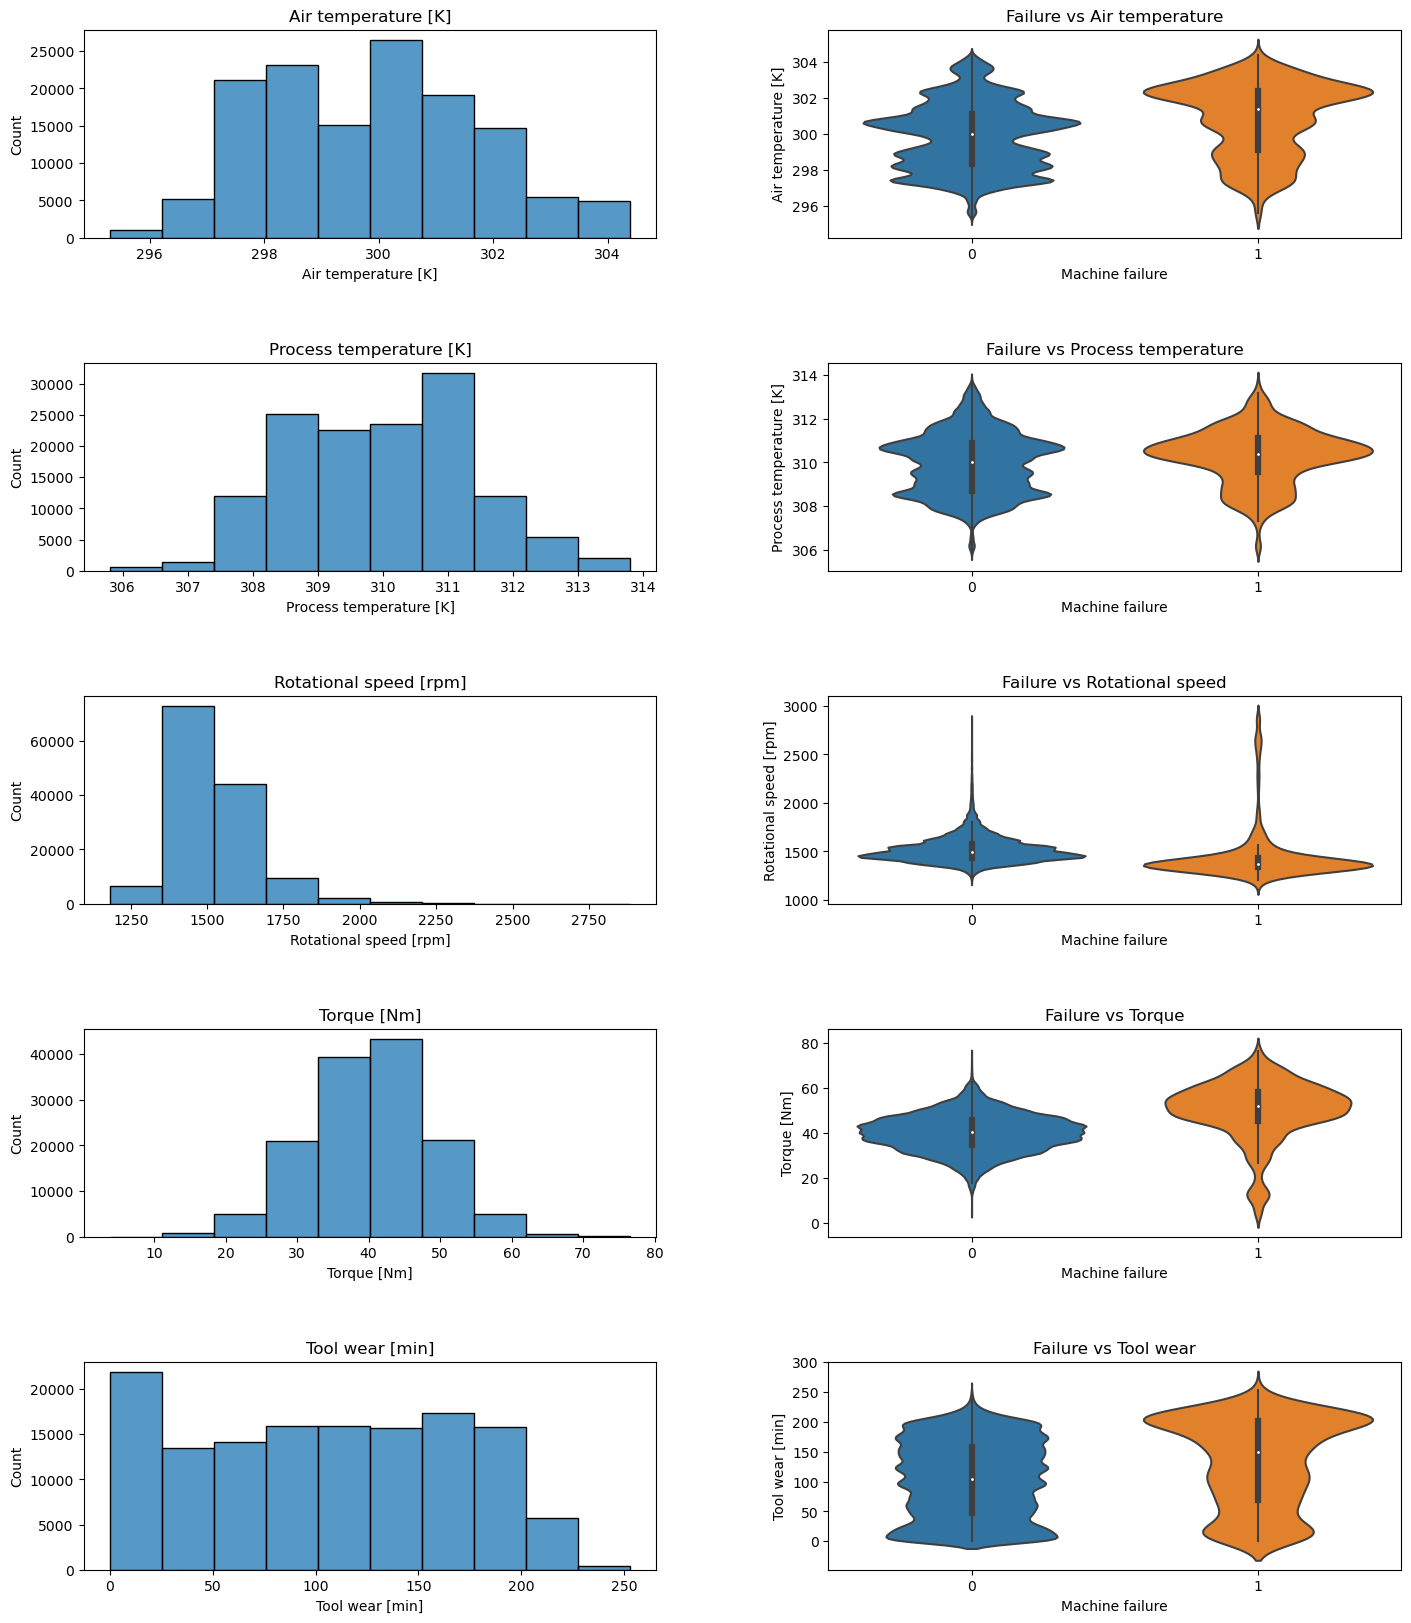

In [10]:
f,ax=plt.subplots(5,2,figsize=(17,20))

# 1-2 график
sns.histplot(x='Air temperature [K]',data=data_train,ax=ax[0,0],  bins=10)
ax[0,0].set_title('Air temperature [K]')
ax[0,0].bar_label(ax[0,0].containers[0])

sns.violinplot(x = 'Machine failure', y= 'Air temperature [K]', data=data_train,ax=ax[0,1])
ax[0,1].set_title('Failure vs Air temperature')

# 3-4 график
sns.histplot(x='Process temperature [K]',data=data_train,ax=ax[1,0],  bins=10)
ax[1,0].set_title('Process temperature [K]')
ax[1,0].bar_label(ax[1,0].containers[0])

sns.violinplot(x = 'Machine failure', y= 'Process temperature [K]', data=data_train,ax=ax[1,1])
ax[1,1].set_title('Failure vs Process temperature')

# 5-6 график
sns.histplot(x='Rotational speed [rpm]',data=data_train,ax=ax[2,0],  bins=10)
ax[2,0].set_title('Rotational speed [rpm]')
ax[2,0].bar_label(ax[2,0].containers[0])

sns.violinplot(x = 'Machine failure', y= 'Rotational speed [rpm]', data=data_train,ax=ax[2,1])
ax[2,1].set_title('Failure vs Rotational speed')

# 7-8 график
sns.histplot(x='Torque [Nm]',data=data_train,ax=ax[3,0],  bins=10)
ax[3,0].set_title('Torque [Nm]')
ax[3,0].bar_label(ax[2,0].containers[0])

sns.violinplot(x = 'Machine failure', y= 'Torque [Nm]', data=data_train,ax=ax[3,1])
ax[3,1].set_title('Failure vs Torque')

# 9-10 график
sns.histplot(x='Tool wear [min]',data=data_train,ax=ax[4,0],  bins=10)
ax[4,0].set_title('Tool wear [min]')
ax[4,0].bar_label(ax[2,0].containers[0])

sns.violinplot(x = 'Machine failure', y= 'Tool wear [min]', data=data_train,ax=ax[4,1])
ax[4,1].set_title('Failure vs Tool wear')

plt.subplots_adjust(wspace=0.3,hspace=0.6)
plt.show()

По результатам анализа, можно добавить несколько признаков, которые дополнительно будут отражать состояние системы. 

## Feature engineering

In [66]:
data_train['Power'] = data_train['Torque [Nm]'] * data_train['Rotational speed [rpm]']
data_train['TempDiff'] = data_train['Process temperature [K]'] - data_train['Air temperature [K]']
data_train['Fail'] = data_train['TWF'] + data_train['HDF'] + data_train['PWF'] + data_train['OSF'] + data_train['RNF']
data_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Power,TempDiff,Fail
id,,,,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,57615.6,9.0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,51186.9,9.5,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,47832.5,9.2,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,67513.2,9.9,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,58091.4,11.0,0


In [67]:
data_test['Power'] = data_test['Torque [Nm]'] * data_test['Rotational speed [rpm]']
data_test['TempDiff'] = data_test['Process temperature [K]'] - data_test['Air temperature [K]']
data_test['Fail'] = data_test['TWF'] + data_test['HDF'] + data_test['PWF'] + data_test['OSF'] + data_test['RNF']
data_test.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Power,TempDiff,Fail
id,,,,,,,,,,,,,,,
136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,56962.0,9.2,0
136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,49334.4,9.3,0
136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,57492.5,9.1,0
136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,70400.4,9.5,0
136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,62569.5,8.9,0


In [68]:
data_train.drop(['Product ID'],  axis=1, inplace=True)
data_test.drop(['Product ID'],  axis=1, inplace=True)

In [69]:
b = pd.get_dummies(data_train['Type'])
data_train = data_train.drop(['Type'], axis=1)
data_train = data_train.merge(b, on='id', how='right')

In [70]:
b = pd.get_dummies(data_test['Type'])
data_test = data_test.drop(['Type'], axis=1)
data_test = data_test.merge(b, on='id', how='right')

In [16]:
data_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Power,TempDiff,Fail,H,L,M
id,,,,,,,,,,,,,,,,,
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,57615.6,9.0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,51186.9,9.5,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,47832.5,9.2,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,67513.2,9.9,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,58091.4,11.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,57375.0,11.3,0,0,0,1
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,71047.7,11.0,0,1,0,0
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,58674.0,11.3,0,0,1,0


In [71]:
X = data_train.drop(['Machine failure'],  axis=1)
y = data_train['Machine failure']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

Для получения более точной модели стандартизируем значения нашего дата-сета.

### StandartScaler

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler().fit(X_train)

In [75]:
X_train.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Power', 'TempDiff', 'Fail', 'H', 'L', 'M'],
      dtype='object')

In [76]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_train_scaled.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Power,TempDiff,Fail,H,L,M
0,0.665846,0.620468,-0.263506,-0.073704,1.008403,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,-0.155754,-0.385908,-0.11699,-0.263877,0.656269,-0.555693
1,-1.374793,-1.038561,-0.587092,-0.249953,-0.647004,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,-0.568950,1.138516,-0.11699,-0.263877,0.656269,-0.555693
2,-0.998886,-1.254956,-1.061685,0.431541,0.680445,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,0.001061,0.122233,-0.11699,-0.263877,-1.523765,1.799555
3,-1.374793,-1.327088,-0.105309,-0.931446,-0.443983,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,-1.215756,0.732003,-0.11699,-0.263877,0.656269,-0.555693
4,0.504743,-0.172980,-1.011349,0.948536,-0.131642,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,0.669297,-1.198935,-0.11699,3.789648,-1.523765,-0.555693


In [77]:
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns = X_valid.columns)
X_valid_scaled.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Power,TempDiff,Fail,H,L,M
0,0.451042,-0.245112,-0.263506,0.008545,-1.412239,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,-0.046951,-1.198935,-0.11699,-0.263877,0.656269,-0.555693
1,-0.945185,-1.687746,-0.659000,0.349292,0.789764,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,0.154368,-0.589165,-0.11699,-0.263877,0.656269,-0.555693
2,0.182537,-0.317244,-1.126402,1.312782,-1.552793,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,1.031065,-0.792422,-0.11699,-0.263877,-1.523765,1.799555
3,0.773248,0.692600,0.541863,-0.872697,-1.552793,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,-0.826755,-0.487537,-0.11699,-0.263877,0.656269,-0.555693
4,-2.287710,-2.841854,-1.133592,-0.813947,-1.412239,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,-1.558274,0.325490,-0.11699,-0.263877,0.656269,-0.555693


In [78]:
data_test = pd.DataFrame(scaler.transform(data_test), columns = data_test.columns, index=data_test.index)
data_test.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Power,TempDiff,Fail,H,L,M
id,,,,,,,,,,,,,,,,
136429,1.310258,1.125390,-0.155644,-0.273452,-0.693855,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,-0.360289,-0.894050,-0.11699,-0.263877,0.656269,-0.555693
136430,0.988052,0.764732,1.383186,-1.354442,-1.365388,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,-1.159197,-0.792422,-0.11699,-0.263877,0.656269,-0.555693
136431,0.773248,0.331941,0.031316,-0.308702,-0.131642,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,-0.304725,-0.995678,-0.11699,-0.263877,0.656269,-0.555693
136432,0.128836,-0.245112,-0.299460,0.854537,-1.552793,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,1.047237,-0.589165,-0.11699,-0.263877,-1.523765,1.799555
136433,1.900970,1.702444,-0.040592,0.114294,0.149465,-0.038674,-0.071686,-0.049521,-0.062892,-0.047915,0.227036,-1.198935,-0.11699,-0.263877,-1.523765,1.799555


## Model creation 

#### *Support Vector Machine*

In [24]:
from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [1, 5, 10, 50],
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
# #               'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = SVC(kernel='rbf')

Ноут опять не хочет работать с GridSearchCV, что очень жаль. 

In [25]:
%%time
grid.fit(X_train_scaled, y_train)

CPU times: total: 1min 1s
Wall time: 1min 1s


SVC()

In [26]:
X_train_predicted = grid.predict(X_train_scaled)
X_valid_predicted = grid.predict(X_valid_scaled)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
mean_absolute_error(X_train_predicted, y_train), mean_squared_error(X_train_predicted, y_train)

(0.015401812301292799, 0.015401812301292799)

In [29]:
mean_absolute_error(X_valid_predicted, y_valid), mean_squared_error(X_valid_predicted, y_valid)

(0.003664883090229422, 0.003664883090229422)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, X_valid_predicted, target_names = ['Not Failed', 'Failed']))

              precision    recall  f1-score   support

  Not Failed       1.00      1.00      1.00     26852
      Failed       0.99      0.77      0.87       434

    accuracy                           1.00     27286
   macro avg       1.00      0.89      0.93     27286
weighted avg       1.00      1.00      1.00     27286



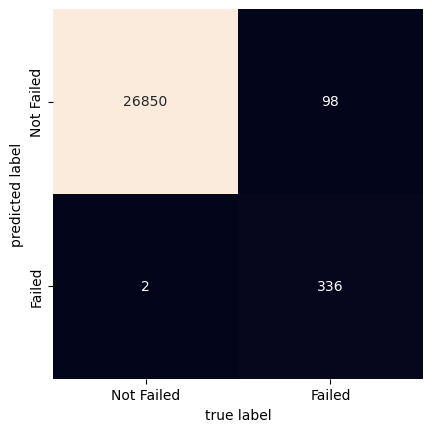

In [31]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_valid, X_valid_predicted)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = ['Not Failed', 'Failed'],
            yticklabels = ['Not Failed', 'Failed'])
plt.xlabel('true label')
plt.ylabel('predicted label');

Моделька работает неидеально, поэтому вручную проверим несколько сочетаний параметров, в надежде на улучшения.

In [35]:
grid = SVC(kernel='sigmoid')

In [37]:
%%time
grid.fit(X_train_scaled, y_train)

CPU times: total: 8.66 s
Wall time: 8.66 s


SVC(kernel='sigmoid')

In [38]:
X_train_predicted = grid.predict(X_train_scaled)
X_valid_predicted = grid.predict(X_valid_scaled)

In [42]:
mean_absolute_error(X_train_predicted, y_train), mean_squared_error(X_train_predicted, y_train)

(0.015401812301292799, 0.015401812301292799)

In [43]:
mean_absolute_error(X_valid_predicted, y_valid), mean_squared_error(X_valid_predicted, y_valid)

(0.01546580664076816, 0.01546580664076816)

In [44]:
print(classification_report(y_valid, X_valid_predicted, target_names = ['Not Failed', 'Failed']))

              precision    recall  f1-score   support

  Not Failed       0.99      0.99      0.99     26852
      Failed       0.51      0.48      0.50       434

    accuracy                           0.98     27286
   macro avg       0.75      0.73      0.74     27286
weighted avg       0.98      0.98      0.98     27286



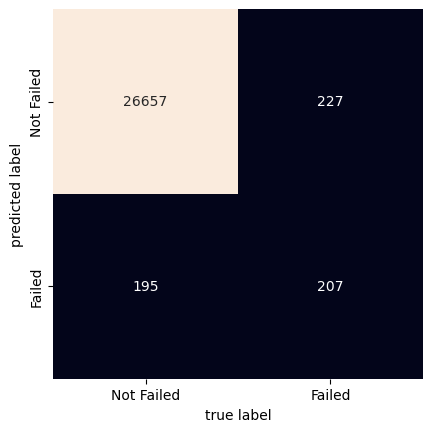

In [45]:
mat = confusion_matrix(y_valid, X_valid_predicted)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = ['Not Failed', 'Failed'],
            yticklabels = ['Not Failed', 'Failed'])
plt.xlabel('true label')
plt.ylabel('predicted label');

К сожалению, лучше не стало, тестим дальше.

In [53]:
grid = SVC(C=5, kernel='poly', gamma= 0.001)

In [54]:
%%time
grid.fit(X_train_scaled, y_train)

CPU times: total: 5.17 s
Wall time: 5.2 s


SVC(C=5, gamma=0.001, kernel='poly')

In [55]:
X_train_predicted = grid.predict(X_train_scaled)
X_valid_predicted = grid.predict(X_valid_scaled)

In [56]:
mean_absolute_error(X_train_predicted, y_train), mean_squared_error(X_train_predicted, y_train)

(0.003857324794077495, 0.003857324794077495)

In [57]:
mean_absolute_error(X_valid_predicted, y_valid), mean_squared_error(X_valid_predicted, y_valid)

(0.003664883090229422, 0.003664883090229422)

In [58]:
print(classification_report(y_valid, X_valid_predicted, target_names = ['Not Failed', 'Failed']))

              precision    recall  f1-score   support

  Not Failed       1.00      1.00      1.00     26852
      Failed       0.99      0.77      0.87       434

    accuracy                           1.00     27286
   macro avg       1.00      0.89      0.93     27286
weighted avg       1.00      1.00      1.00     27286



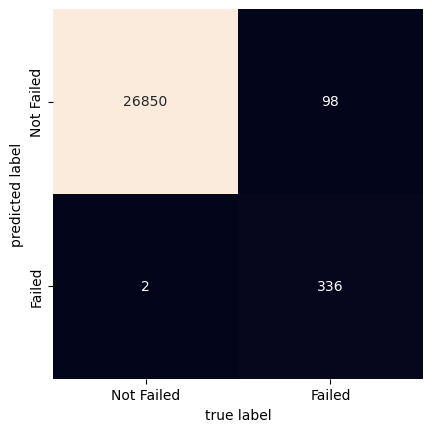

In [59]:
mat = confusion_matrix(y_valid, X_valid_predicted)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = ['Not Failed', 'Failed'],
            yticklabels = ['Not Failed', 'Failed'])
plt.xlabel('true label')
plt.ylabel('predicted label');

Получили аналогичный результат с первой моделью. В целом, неплохо, false positive - 2, false negative - 98. 

Закинем полученный результат в Kaggle и посмотрим, что получится.

In [79]:
X_predicted_test = grid.predict(data_test)

In [80]:
result = pd.DataFrame({'Machine failure': X_predicted_test}, index = data_test.index)
result.to_csv(r'submission.csv')

Этот результат лучше того, что был мною получен в прошлый раз(0.5), так что я уже рада. Но это не предел, будем стремиться к 1.

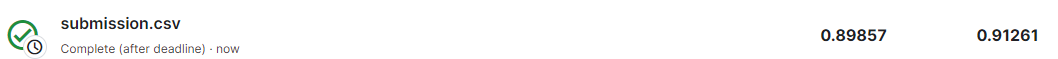